In [1]:
import pandas as pd
granularity = 10

if granularity == 50:


    df_cultura = pd.read_csv("../results_50/raw_results.csv", index_col = [0])

elif granularity == 10:


    df_cultura = pd.read_csv("../results_10/raw_results.csv", index_col = [0])


df_cultura['N_est'] = df_cultura['f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual
df_cultura['N_est_min']  =  df_cultura['min_f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual
df_cultura['N_est_max']  =  df_cultura['max_f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual

print(len(set(df_cultura.individual_wikidata_id)))

df_cultura = df_cultura.groupby(['region_name', 'decade']).agg({'N_est': 'sum', 'N_est_min':'sum', 'N_est_max':'sum', 'individual_wikidata_id':'count'}).reset_index()
df_cultura = df_cultura.rename(columns={"individual_wikidata_id": "score"})
df_cultura = df_cultura[df_cultura['decade'] <=1870]

df_cultura_world = df_cultura.drop('region_name', axis=1).groupby('decade').sum().reset_index()
df_cultura_world['region_name']='world'

df_cultura = pd.concat([df_cultura_world, df_cultura])


108776


### Grid Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.ticker import MultipleLocator

df = df_cultura.copy()


In [45]:
display_periods = False

### Western Europe

In [47]:
list(set(df['region_name']))

['France',
 'Chinese world',
 'German world',
 'Persian world',
 'East Slavic',
 'Central Europe',
 'Spain',
 'United Kingdom',
 'Greek World',
 'Japan',
 'Italy',
 'Portugal',
 'Korea',
 'world',
 'Latin World',
 'Low countries',
 'Nordic countries',
 'Arabic world',
 'Indian world']

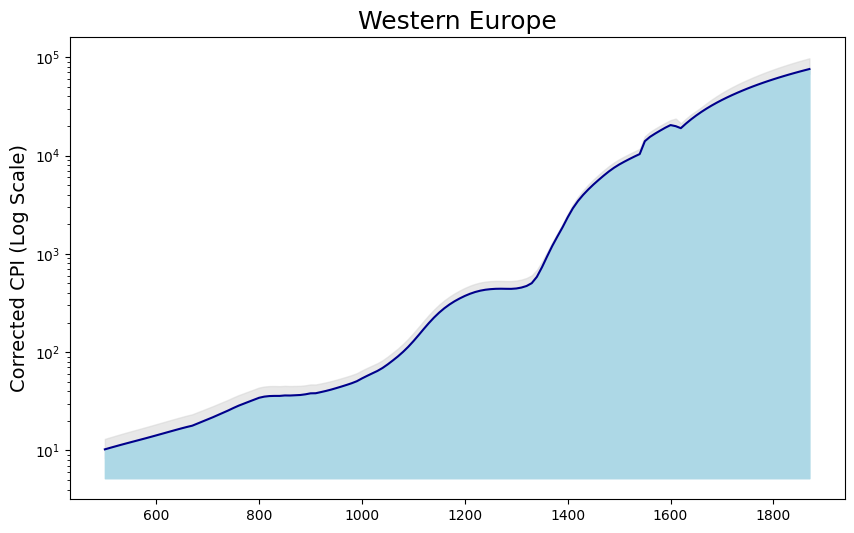

In [58]:
df = df_cultura.copy()

region_eu = ['France',
 'German world',
 'Spain',
 'United Kingdom',
 'Italy',
 'Portugal',
 'Low countries',
 'Nordic countries']

df_region = df[df['region_name'].isin(region_eu)]
df_region = df_region.drop('region_name', axis=1)
df_region = df_region.groupby(['decade']).sum().reset_index()
df_region

df_region = df_region[df_region['decade']>=500]


# Plot setup
plt.figure(figsize=(10, 6))

# LOESS regression for N_est
n = 0.2  # Smoothing fraction
lowess = sm.nonparametric.lowess(df_region['N_est'], df_region['decade'], frac=n)
plt.plot(lowess[:, 0], lowess[:, 1], label='N_est', color='darkblue')

# Compute LOESS for N_est_min and N_est_max
lowess_min = sm.nonparametric.lowess(df_region['N_est_min'], df_region['decade'], frac=n)
lowess_max = sm.nonparametric.lowess(df_region['N_est_max'], df_region['decade'], frac=n)

# Set y-axis ticks to every 100 and log scale
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.yscale('log')


# Add title and labels
plt.title('Western Europe',fontsize=18)
plt.xlabel('')
plt.ylabel('Corrected CPI (Log Scale)',  fontsize=14)

    # Fill between the minimum and maximum LOESS regressions
plt.fill_between(lowess_min[:, 0], lowess_min[:, 1], lowess_max[:, 1], color='lightgrey', alpha=0.5)

# Fill from bottom to the N_est line
plt.fill_between(lowess[:, 0], plt.ylim()[0], lowess[:, 1], color='lightblue', alpha=1)

### Japan

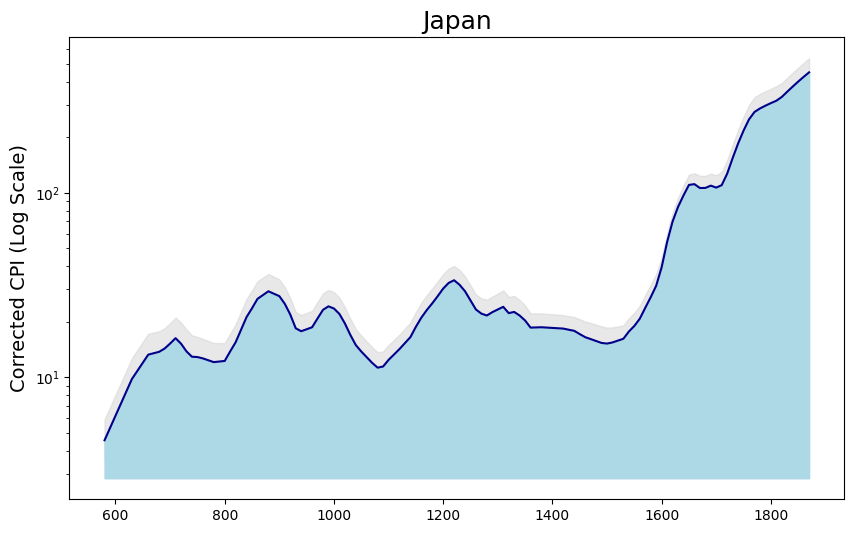

In [44]:
df = df_cultura.copy()

region = 'Japan'
df_region = df[df['region_name'] == region]
df_region = df_region[df_region['decade']>=500]

# Plot setup
plt.figure(figsize=(10, 6))

# LOESS regression for N_est
n = 0.1  # Smoothing fraction
lowess = sm.nonparametric.lowess(df_region['N_est'], df_region['decade'], frac=n)
plt.plot(lowess[:, 0], lowess[:, 1], label='N_est', color='darkblue')

# Compute LOESS for N_est_min and N_est_max
lowess_min = sm.nonparametric.lowess(df_region['N_est_min'], df_region['decade'], frac=n)
lowess_max = sm.nonparametric.lowess(df_region['N_est_max'], df_region['decade'], frac=n)

# Set y-axis ticks to every 100 and log scale
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.yscale('log')



# Add title and labels
plt.title('Japan',fontsize=18)
plt.xlabel('')
plt.ylabel('Corrected CPI (Log Scale)',  fontsize=14)

    # Fill between the minimum and maximum LOESS regressions
plt.fill_between(lowess_min[:, 0], lowess_min[:, 1], lowess_max[:, 1], color='lightgrey', alpha=0.5)

# Fill from bottom to the N_est line
plt.fill_between(lowess[:, 0], plt.ylim()[0], lowess[:, 1], color='lightblue', alpha=1)

if display_periods:

    # Highlight the Heian period with vertical lines and fill
    heian_start, heian_end = 750, 1258
    plt.axvline(x=heian_start, color='grey', linestyle='--')
    plt.axvline(x=heian_end, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start, x2=heian_end, color='lightgrey', alpha=0.3)

    plt.tick_params(axis='x', labelsize=14)  # Increase the font size to 14 or any other size as desired
    plt.text((heian_start + heian_end) / 2, plt.ylim()[1]-300, 'Heian Period', horizontalalignment='center', verticalalignment='top', fontsize=20, color='black')


    # Highlight the Heian period with vertical lines and fill
    heian_start_2, heian_end_2 = 1603, 1850
    plt.axvline(x=heian_start_2, color='grey', linestyle='--')
    plt.axvline(x=heian_end_2, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start_2, x2=heian_end_2, color='lightgrey', alpha=0.3)

    plt.text((heian_start_2 + heian_end_2) / 2, plt.ylim()[1]-500, 'Edo Period', horizontalalignment='center', verticalalignment='top', fontsize=15, color='black')



#### Greece

/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_7722/487651341.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_region = df_region[df['decade']<=500]


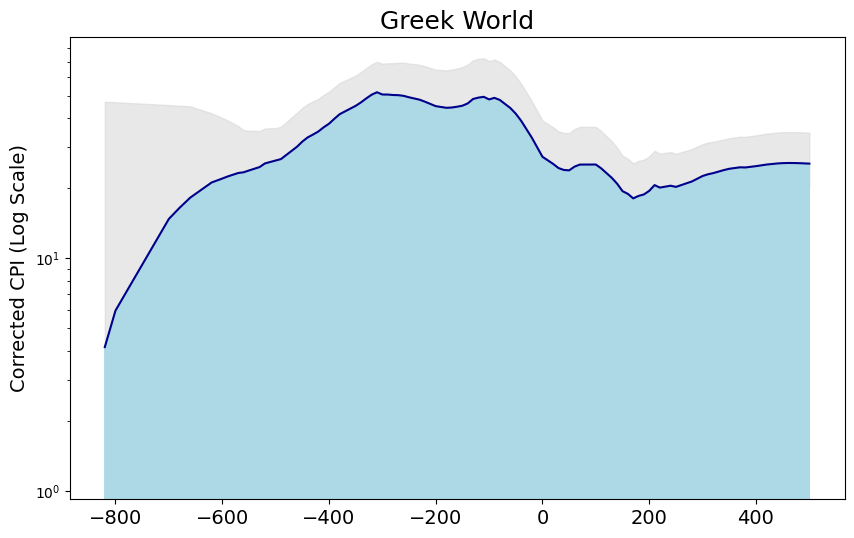

In [43]:
df = df_cultura.copy()

region = 'Greek World'
df_region = df[df['region_name'] == region]
df_region = df_region[df['decade']<=500]


# Plot setup
plt.figure(figsize=(10, 6))

# LOESS regression for N_est
n = 0.2  # Smoothing fraction
lowess = sm.nonparametric.lowess(df_region['N_est'], df_region['decade'], frac=n)
plt.plot(lowess[:, 0], lowess[:, 1], label='N_est', color='darkblue')

# Compute LOESS for N_est_min and N_est_max
lowess_min = sm.nonparametric.lowess(df_region['N_est_min'], df_region['decade'], frac=n)
lowess_max = sm.nonparametric.lowess(df_region['N_est_max'], df_region['decade'], frac=n)

# Fill between the minimum and maximum LOESS regressions
plt.fill_between(lowess_min[:, 0], lowess_min[:, 1], lowess_max[:, 1], color='lightgrey', alpha=0.5)

# Fill from bottom to the N_est line
plt.fill_between(lowess[:, 0], plt.ylim()[0], lowess[:, 1], color='lightblue', alpha=1)


# Set y-axis ticks to every 100 and log scale
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.yscale('log')

# Add title and labels
plt.title('Greek World',fontsize=18)
plt.xlabel('')
plt.ylabel('Corrected CPI (Log Scale)',  fontsize=14)
plt.tick_params(axis='x', labelsize=14)  # Increase the font size to 14 or any other size as desired

if display_periods:

    # Highlight the Heian period with vertical lines and fill
    heian_start, heian_end = -480, -323
    plt.axvline(x=heian_start, color='grey', linestyle='--')
    plt.axvline(x=heian_end, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start, x2=heian_end, color='lightgrey', alpha=0.3)

    plt.text((heian_start + heian_end) / 2, plt.ylim()[1]-20, 'Classical Athens', horizontalalignment='center', verticalalignment='top', fontsize=20, color='black')




### Latin World

/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_7722/2356529040.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_region = df_region[df['decade']<=500]


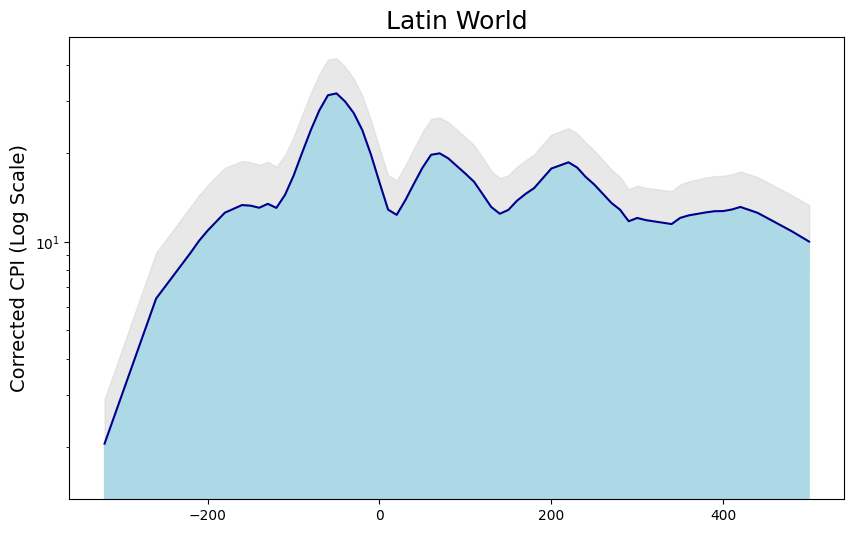

In [25]:
df = df_cultura.copy()

region = 'Latin World'
df_region = df[df['region_name'] == region]
df_region = df_region[df['decade']<=500]


# Plot setup
plt.figure(figsize=(10, 6))

# LOESS regression for N_est
n = 0.2  # Smoothing fraction
lowess = sm.nonparametric.lowess(df_region['N_est'], df_region['decade'], frac=n)
plt.plot(lowess[:, 0], lowess[:, 1], label='N_est', color='darkblue')

# Compute LOESS for N_est_min and N_est_max
lowess_min = sm.nonparametric.lowess(df_region['N_est_min'], df_region['decade'], frac=n)
lowess_max = sm.nonparametric.lowess(df_region['N_est_max'], df_region['decade'], frac=n)

# Fill between the minimum and maximum LOESS regressions
plt.fill_between(lowess_min[:, 0], lowess_min[:, 1], lowess_max[:, 1], color='lightgrey', alpha=0.5)

# Fill from bottom to the N_est line
plt.fill_between(lowess[:, 0], plt.ylim()[0], lowess[:, 1], color='lightblue', alpha=1)

# Set y-axis ticks to every 100 and log scale
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.yscale('log')

# Add title and labels
plt.title('Latin World',fontsize=18)
plt.xlabel('')
plt.ylabel('Corrected CPI (Log Scale)',  fontsize=14)

if display_periods:

    # Highlight the Heian period with vertical lines and fill
    heian_start, heian_end = -31, -193
    plt.axvline(x=heian_start, color='grey', linestyle='--')
    plt.axvline(x=heian_end, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start, x2=heian_end, color='lightgrey', alpha=0.3)

    plt.tick_params(axis='x', labelsize=14)  # Increase the font size to 14 or any other size as desired
    plt.text((heian_start + heian_end) / 2, plt.ylim()[1]-10, 'Early Roman Empire', horizontalalignment='center', verticalalignment='top', fontsize=20, color='black')


### Arabic World

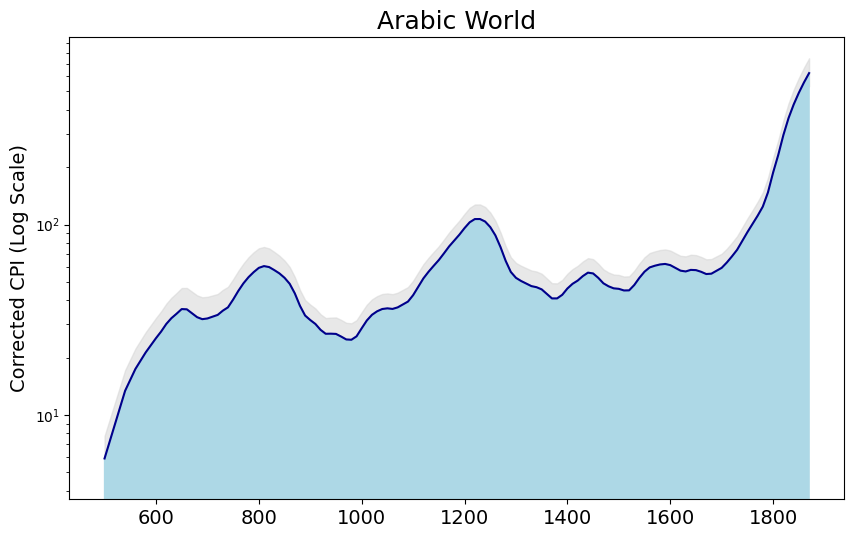

In [26]:
df = df_cultura.copy()

region = 'Arabic world'
df_region = df[df['region_name'] == region]
#df_region = df_region[df['decade']<=500]


# Plot setup
plt.figure(figsize=(10, 6))

# LOESS regression for N_est
n = 0.1  # Smoothing fraction
lowess = sm.nonparametric.lowess(df_region['N_est'], df_region['decade'], frac=n)
plt.plot(lowess[:, 0], lowess[:, 1], label='N_est', color='darkblue')

# Compute LOESS for N_est_min and N_est_max
lowess_min = sm.nonparametric.lowess(df_region['N_est_min'], df_region['decade'], frac=n)
lowess_max = sm.nonparametric.lowess(df_region['N_est_max'], df_region['decade'], frac=n)

# Fill between the minimum and maximum LOESS regressions
plt.fill_between(lowess_min[:, 0], lowess_min[:, 1], lowess_max[:, 1], color='lightgrey', alpha=0.5)

# Fill from bottom to the N_est line
plt.fill_between(lowess[:, 0], plt.ylim()[0], lowess[:, 1], color='lightblue', alpha=1)

# Set y-axis ticks to every 100 and log scale
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.yscale('log')


# Add title and labels
plt.title('Arabic World',fontsize=18)
plt.xlabel('')
plt.ylabel('Corrected CPI (Log Scale)',  fontsize=14)
plt.tick_params(axis='x', labelsize=14)  # Increase the font size to 14 or any other size as desired

if display_periods:

    # Highlight the Heian period with vertical lines and fill
    heian_start, heian_end = 750, 1258
    plt.axvline(x=heian_start, color='grey', linestyle='--')
    plt.axvline(x=heian_end, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start, x2=heian_end, color='lightgrey', alpha=0.3)

    plt.text((heian_start + heian_end) / 2, plt.ylim()[1]-500, 'Abbasid Caliphate', horizontalalignment='center', verticalalignment='top', fontsize=20, color='black')


### China

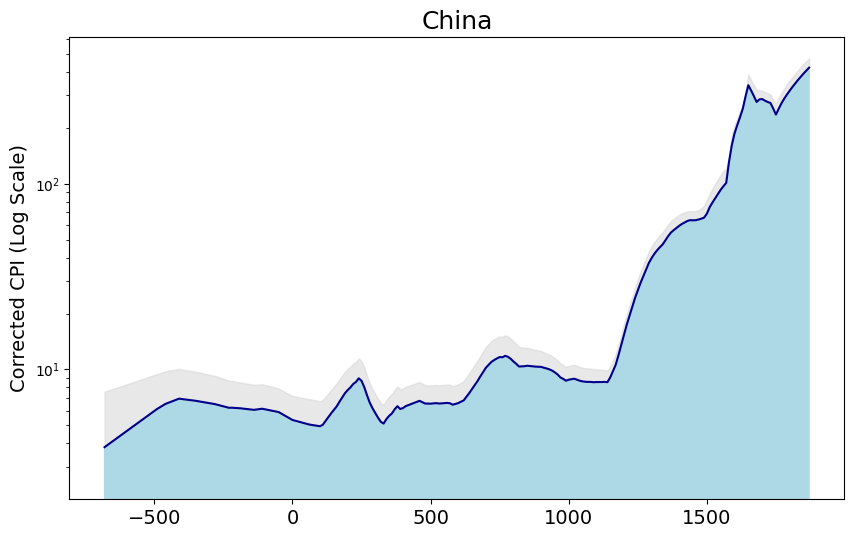

In [42]:
df = df_cultura.copy()

region = 'Chinese world'
df_region = df[df['region_name'] == region]
#df_region = df_region[df['decade']<=500]


# Plot setup
plt.figure(figsize=(10, 6))

# LOESS regression for N_est
n = 0.1  # Smoothing fraction
lowess = sm.nonparametric.lowess(df_region['N_est'], df_region['decade'], frac=n)
plt.plot(lowess[:, 0], lowess[:, 1], label='N_est', color='darkblue')

# Compute LOESS for N_est_min and N_est_max
lowess_min = sm.nonparametric.lowess(df_region['N_est_min'], df_region['decade'], frac=n)
lowess_max = sm.nonparametric.lowess(df_region['N_est_max'], df_region['decade'], frac=n)

# Fill between the minimum and maximum LOESS regressions
plt.fill_between(lowess_min[:, 0], lowess_min[:, 1], lowess_max[:, 1], color='lightgrey', alpha=0.5)

# Fill from bottom to the N_est line
plt.fill_between(lowess[:, 0], plt.ylim()[0], lowess[:, 1], color='lightblue', alpha=1)

# Add title and labels
plt.title('China',fontsize=18)
plt.xlabel('')
plt.ylabel('Corrected CPI (Log Scale)',  fontsize=14)
plt.tick_params(axis='x', labelsize=14)  # Increase the font size to 14 or any other size as desired


# Set y-axis ticks to every 100 and log scale
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.yscale('log')


if display_periods:


    # Highlight the Heian period with vertical lines and fill
    heian_start, heian_end = 1127, 1279
    plt.axvline(x=heian_start, color='grey', linestyle='--')
    plt.axvline(x=heian_end, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start, x2=heian_end, color='lightgrey', alpha=0.3)


    plt.text((heian_start + heian_end) / 2, plt.ylim()[1]-500, 'Southern Song Dynasty', horizontalalignment='center', verticalalignment='top', fontsize=15, color='black')


    # Highlight the Heian period with vertical lines and fill
    heian_start_2, heian_end_2 = 1368, 1644
    plt.axvline(x=heian_start_2, color='grey', linestyle='--')
    plt.axvline(x=heian_end_2, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start_2, x2=heian_end_2, color='lightgrey', alpha=0.3)

    plt.text((heian_start_2 + heian_end_2) / 2, plt.ylim()[1]-500, 'Early Ming Dynasty', horizontalalignment='center', verticalalignment='top', fontsize=15, color='black')


    # Highlight the Heian period with vertical lines and fill
    heian_start_3, heian_end_3 = 1683, 1799
    plt.axvline(x=heian_start_3, color='grey', linestyle='--')
    plt.axvline(x=heian_end_3, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start_3, x2=heian_end_3, color='lightgrey', alpha=0.3)

    plt.text((heian_start_3 + heian_end_3) / 2, plt.ylim()[1]-500, 'High Qing dynasty', horizontalalignment='center', verticalalignment='top', fontsize=15, color='black')

### United Kingdom

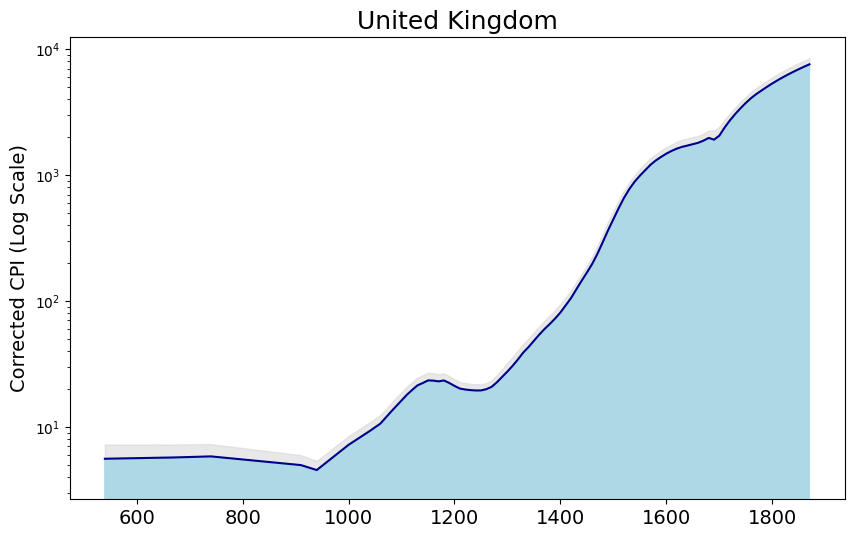

In [29]:
df = df_cultura.copy()

region = 'United Kingdom'
df_region = df[df['region_name'] == region]
#df_region = df_region[df['decade']<=500]


# Plot setup
plt.figure(figsize=(10, 6))

# LOESS regression for N_est
n = 0.2  # Smoothing fraction
lowess = sm.nonparametric.lowess(df_region['N_est'], df_region['decade'], frac=n)
plt.plot(lowess[:, 0], lowess[:, 1], label='N_est', color='darkblue')

# Compute LOESS for N_est_min and N_est_max
lowess_min = sm.nonparametric.lowess(df_region['N_est_min'], df_region['decade'], frac=n)
lowess_max = sm.nonparametric.lowess(df_region['N_est_max'], df_region['decade'], frac=n)

# Fill between the minimum and maximum LOESS regressions
plt.fill_between(lowess_min[:, 0], lowess_min[:, 1], lowess_max[:, 1], color='lightgrey', alpha=0.5)

# Fill from bottom to the N_est line
plt.fill_between(lowess[:, 0], plt.ylim()[0], lowess[:, 1], color='lightblue', alpha=1)


# Set y-axis ticks to every 100 and log scale
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.yscale('log')


# Add title and labels
plt.title('United Kingdom',fontsize=18)
plt.xlabel('')
plt.ylabel('Corrected CPI (Log Scale)',  fontsize=14)
plt.tick_params(axis='x', labelsize=14)  # Increase the font size to 14 or any other size as desired

if display_periods:

    # Highlight the Heian period with vertical lines and fill
    heian_start, heian_end = 1127, 1279
    plt.axvline(x=heian_start, color='grey', linestyle='--')
    plt.axvline(x=heian_end, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start, x2=heian_end, color='lightgrey', alpha=0.3)


    plt.text((heian_start + heian_end) / 2, plt.ylim()[1]-1000, 'The Renaissance of the 12th century', horizontalalignment='center', verticalalignment='top', fontsize=20, color='black')


### France

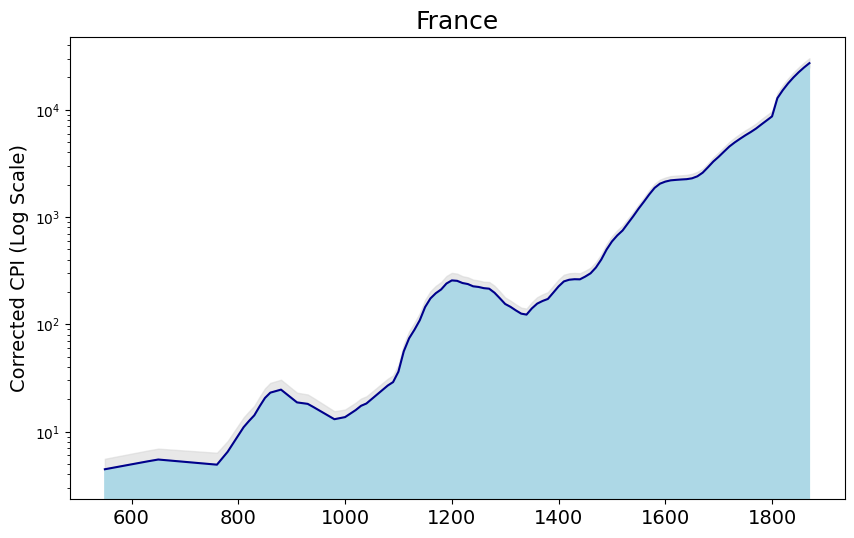

In [61]:
df = df_cultura.copy()

region = 'France'
df_region = df[df['region_name'] == region]
#df_region = df_region[df['decade']<=500]


# Plot setup
plt.figure(figsize=(10, 6))

# LOESS regression for N_est
n = 0.1  # Smoothing fraction
lowess = sm.nonparametric.lowess(df_region['N_est'], df_region['decade'], frac=n)
plt.plot(lowess[:, 0], lowess[:, 1], label='N_est', color='darkblue')

# Compute LOESS for N_est_min and N_est_max
lowess_min = sm.nonparametric.lowess(df_region['N_est_min'], df_region['decade'], frac=n)
lowess_max = sm.nonparametric.lowess(df_region['N_est_max'], df_region['decade'], frac=n)

# Fill between the minimum and maximum LOESS regressions
plt.fill_between(lowess_min[:, 0], lowess_min[:, 1], lowess_max[:, 1], color='lightgrey', alpha=0.5)

# Fill from bottom to the N_est line
plt.fill_between(lowess[:, 0], plt.ylim()[0], lowess[:, 1], color='lightblue', alpha=1)

# Set y-axis ticks to every 100 and log scale
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.yscale('log')


# Add title and labels
plt.title('France',fontsize=18)
plt.xlabel('')
plt.ylabel('Corrected CPI (Log Scale)',  fontsize=14)
plt.tick_params(axis='x', labelsize=14)  # Increase the font size to 14 or any other size as desired

if display_periods:


    # Highlight the Heian period with vertical lines and fill
    heian_start, heian_end = 1127, 1279
    plt.axvline(x=heian_start, color='grey', linestyle='--')
    plt.axvline(x=heian_end, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start, x2=heian_end, color='lightgrey', alpha=0.3)


    plt.text((heian_start + heian_end) / 2, plt.ylim()[1]-20000, 'The Renaissance of the 12th century', horizontalalignment='center', verticalalignment='top', fontsize=20, color='black')


### Spain

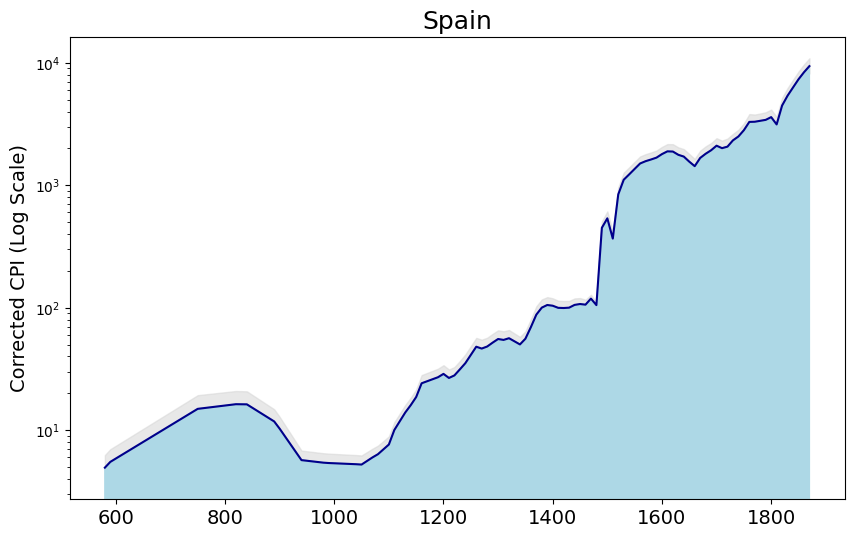

In [31]:
df = df_cultura.copy()

region = 'Spain'
df_region = df[df['region_name'] == region]
#df_region = df_region[df['decade']<=500]


# Plot setup
plt.figure(figsize=(10, 6))

# LOESS regression for N_est
n = 0.1  # Smoothing fraction
lowess = sm.nonparametric.lowess(df_region['N_est'], df_region['decade'], frac=n)
plt.plot(lowess[:, 0], lowess[:, 1], label='N_est', color='darkblue')

# Compute LOESS for N_est_min and N_est_max
lowess_min = sm.nonparametric.lowess(df_region['N_est_min'], df_region['decade'], frac=n)
lowess_max = sm.nonparametric.lowess(df_region['N_est_max'], df_region['decade'], frac=n)

# Fill between the minimum and maximum LOESS regressions
plt.fill_between(lowess_min[:, 0], lowess_min[:, 1], lowess_max[:, 1], color='lightgrey', alpha=0.5)

# Fill from bottom to the N_est line
plt.fill_between(lowess[:, 0], plt.ylim()[0], lowess[:, 1], color='lightblue', alpha=1)

# Set y-axis ticks to every 100 and log scale
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.yscale('log')

# Add title and labels
plt.title('Spain',fontsize=18)
plt.xlabel('')
plt.ylabel('Corrected CPI (Log Scale)',  fontsize=14)
plt.tick_params(axis='x', labelsize=14)  # Increase the font size to 14 or any other size as desired

if display_periods:

    # Highlight the Heian period with vertical lines and fill
    heian_start, heian_end = 1492, 1659
    plt.axvline(x=heian_start, color='grey', linestyle='--')
    plt.axvline(x=heian_end, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start, x2=heian_end, color='lightgrey', alpha=0.3)

    plt.text((heian_start + heian_end) / 2, plt.ylim()[1]-5000, 'Siglo de Oro', horizontalalignment='center', verticalalignment='top', fontsize=20, color='black')


### Italy

/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_7722/521792728.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_region = df_region[df['decade']>=1000]


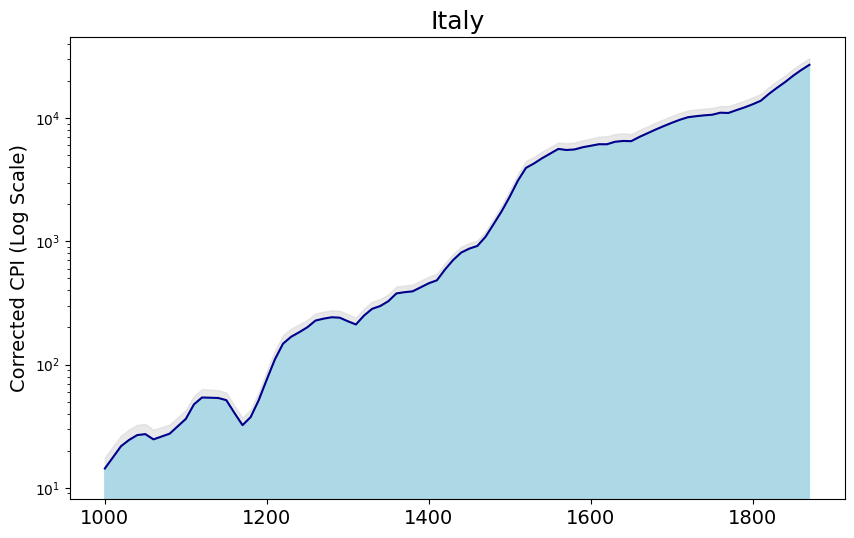

In [32]:
df = df_cultura.copy()

region = 'Italy'
df_region = df[df['region_name'] == region]
df_region = df_region[df['decade']>=1000]


# Plot setup
plt.figure(figsize=(10, 6))

# LOESS regression for N_est
n = 0.1  # Smoothing fraction
lowess = sm.nonparametric.lowess(df_region['N_est'], df_region['decade'], frac=n)
plt.plot(lowess[:, 0], lowess[:, 1], label='N_est', color='darkblue')

# Compute LOESS for N_est_min and N_est_max
lowess_min = sm.nonparametric.lowess(df_region['N_est_min'], df_region['decade'], frac=n)
lowess_max = sm.nonparametric.lowess(df_region['N_est_max'], df_region['decade'], frac=n)

# Fill between the minimum and maximum LOESS regressions
plt.fill_between(lowess_min[:, 0], lowess_min[:, 1], lowess_max[:, 1], color='lightgrey', alpha=0.5)

# Fill from bottom to the N_est line
plt.fill_between(lowess[:, 0], plt.ylim()[0], lowess[:, 1], color='lightblue', alpha=1)

# Set y-axis ticks to every 100 and log scale
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.yscale('log')


# Add title and labels
plt.title('Italy',fontsize=18)
plt.xlabel('')
plt.ylabel('Corrected CPI (Log Scale)',  fontsize=14)
plt.tick_params(axis='x', labelsize=14)  # Increase the font size to 14 or any other size as desired

if display_periods:

    # Highlight the Heian period with vertical lines and fill
    heian_start, heian_end = 1490, 1530
    plt.axvline(x=heian_start, color='grey', linestyle='--')
    plt.axvline(x=heian_end, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start, x2=heian_end, color='lightgrey', alpha=0.3)

    plt.text((heian_start + heian_end) / 2, plt.ylim()[1]-10000, 'High Renaissance', horizontalalignment='center', verticalalignment='top', fontsize=20, color='black')


#### Dutch

/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_7722/2414449271.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_region = df_region[df['decade']>=1000]


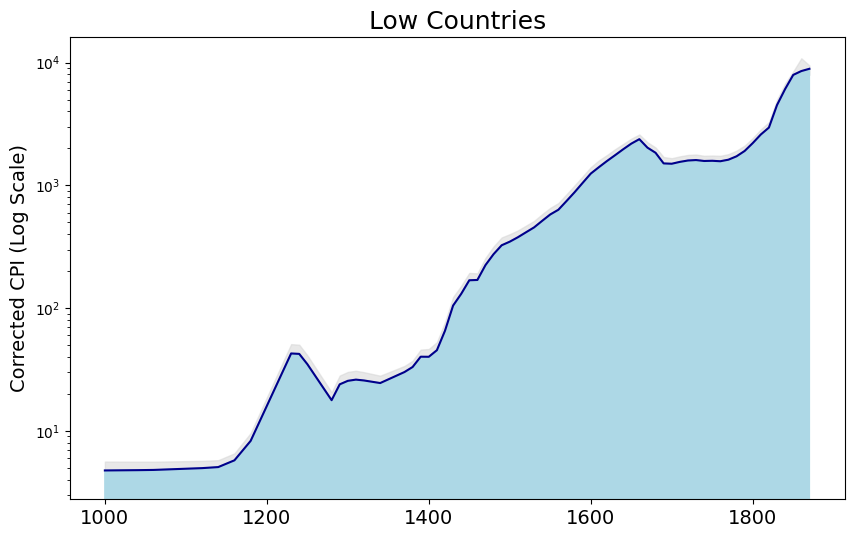

In [33]:
df = df_cultura.copy()

region = 'Low countries'
df_region = df[df['region_name'] == region]
df_region = df_region[df['decade']>=1000]


# Plot setup
plt.figure(figsize=(10, 6))

# LOESS regression for N_est
n = 0.1  # Smoothing fraction
lowess = sm.nonparametric.lowess(df_region['N_est'], df_region['decade'], frac=n)
plt.plot(lowess[:, 0], lowess[:, 1], label='N_est', color='darkblue')

# Compute LOESS for N_est_min and N_est_max
lowess_min = sm.nonparametric.lowess(df_region['N_est_min'], df_region['decade'], frac=n)
lowess_max = sm.nonparametric.lowess(df_region['N_est_max'], df_region['decade'], frac=n)

# Fill between the minimum and maximum LOESS regressions
plt.fill_between(lowess_min[:, 0], lowess_min[:, 1], lowess_max[:, 1], color='lightgrey', alpha=0.5)

# Fill from bottom to the N_est line
plt.fill_between(lowess[:, 0], plt.ylim()[0], lowess[:, 1], color='lightblue', alpha=1)

# Set y-axis ticks to every 100 and log scale
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.yscale('log')


# Add title and labels
plt.title('Low Countries',fontsize=18)
plt.xlabel('')
plt.ylabel('Corrected CPI (Log Scale)',  fontsize=14)
plt.tick_params(axis='x', labelsize=14)  # Increase the font size to 14 or any other size as desired

if display_periods:

    # Highlight the Heian period with vertical lines and fill
    heian_start, heian_end = 1588, 1672
    plt.axvline(x=heian_start, color='grey', linestyle='--')
    plt.axvline(x=heian_end, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start, x2=heian_end, color='lightgrey', alpha=0.3)

    plt.text((heian_start + heian_end) / 2, plt.ylim()[1]-10000, 'Dutch Golden Age', horizontalalignment='center', verticalalignment='top', fontsize=20, color='black')


### India

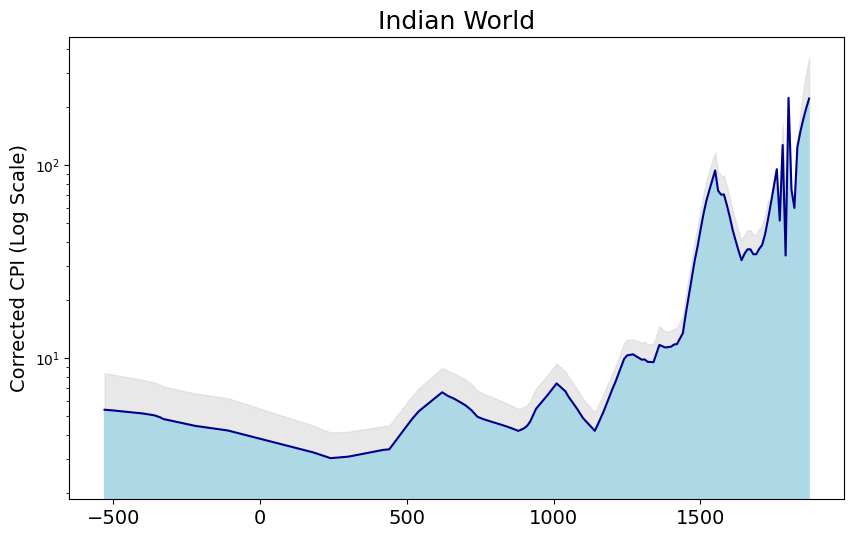

In [34]:
df = df_cultura.copy()

region = 'Indian world'
df_region = df[df['region_name'] == region]
# df_region = df_region[df['decade']>=1000]


# Plot setup
plt.figure(figsize=(10, 6))

# LOESS regression for N_est
n = 0.1  # Smoothing fraction
lowess = sm.nonparametric.lowess(df_region['N_est'], df_region['decade'], frac=n)
plt.plot(lowess[:, 0], lowess[:, 1], label='N_est', color='darkblue')

# Compute LOESS for N_est_min and N_est_max
lowess_min = sm.nonparametric.lowess(df_region['N_est_min'], df_region['decade'], frac=n)
lowess_max = sm.nonparametric.lowess(df_region['N_est_max'], df_region['decade'], frac=n)

# Fill between the minimum and maximum LOESS regressions
plt.fill_between(lowess_min[:, 0], lowess_min[:, 1], lowess_max[:, 1], color='lightgrey', alpha=0.5)

# Fill from bottom to the N_est line
plt.fill_between(lowess[:, 0], plt.ylim()[0], lowess[:, 1], color='lightblue', alpha=1)

# Set y-axis ticks to every 100 and log scale
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.yscale('log')


# Add title and labels
plt.title('Indian World',fontsize=18)
plt.xlabel('')
plt.ylabel('Corrected CPI (Log Scale)',  fontsize=14)
plt.tick_params(axis='x', labelsize=14)  # Increase the font size to 14 or any other size as desired

if display_periods:

    # Highlight the Heian period with vertical lines and fill
    heian_start, heian_end = 250, 550
    plt.axvline(x=heian_start, color='grey', linestyle='--')
    plt.axvline(x=heian_end, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start, x2=heian_end, color='lightgrey', alpha=0.3)

    plt.text((heian_start + heian_end) / 2, plt.ylim()[1]-200, 'Gupta Dynasty', horizontalalignment='center', verticalalignment='top', fontsize=20, color='black')


#### Nordic Countries

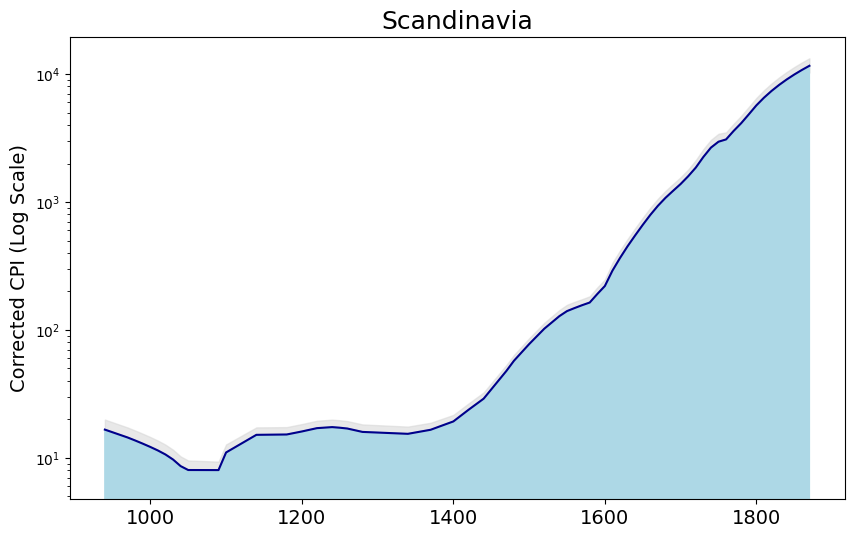

In [59]:
df = df_cultura.copy()

region = 'Nordic countries'
df_region = df[df['region_name'] == region]
# df_region = df_region[df['decade']>=1000]


# Plot setup
plt.figure(figsize=(10, 6))

# LOESS regression for N_est
n = 0.2  # Smoothing fraction
lowess = sm.nonparametric.lowess(df_region['N_est'], df_region['decade'], frac=n)
plt.plot(lowess[:, 0], lowess[:, 1], label='N_est', color='darkblue')

# Compute LOESS for N_est_min and N_est_max
lowess_min = sm.nonparametric.lowess(df_region['N_est_min'], df_region['decade'], frac=n)
lowess_max = sm.nonparametric.lowess(df_region['N_est_max'], df_region['decade'], frac=n)

# Fill between the minimum and maximum LOESS regressions
plt.fill_between(lowess_min[:, 0], lowess_min[:, 1], lowess_max[:, 1], color='lightgrey', alpha=0.5)

# Fill from bottom to the N_est line
plt.fill_between(lowess[:, 0], plt.ylim()[0], lowess[:, 1], color='lightblue', alpha=1)

# Set y-axis ticks to every 100 and log scale
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.yscale('log')

# Add title and labels
plt.title('Scandinavia',fontsize=18)
plt.xlabel('')
plt.ylabel('Corrected CPI (Log Scale)',  fontsize=14)
plt.tick_params(axis='x', labelsize=14)  # Increase the font size to 14 or any other size as desired

if display_periods:

    # Highlight the Heian period with vertical lines and fill
    heian_start, heian_end = 940, 1050
    plt.axvline(x=heian_start, color='grey', linestyle='--')
    plt.axvline(x=heian_end, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start, x2=heian_end, color='lightgrey', alpha=0.3)

    plt.text((heian_start + heian_end) / 2, plt.ylim()[1]-5000, 'The Viking Age', horizontalalignment='center', verticalalignment='top', fontsize=20, color='black')

### Persian World

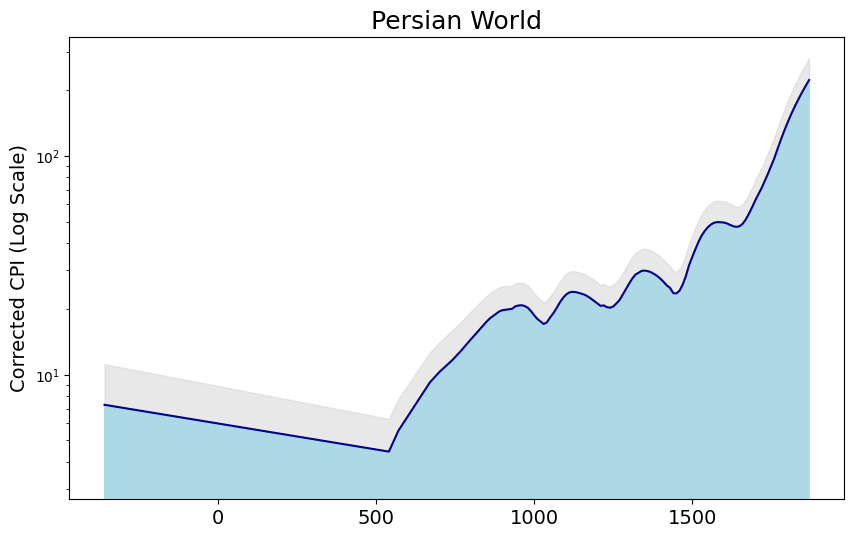

In [39]:
df = df_cultura.copy()

region = 'Persian world'
df_region = df[df['region_name'] == region]
# df_region = df_region[df['decade']>=1000]


# Plot setup
plt.figure(figsize=(10, 6))

# LOESS regression for N_est
n = 0.2  # Smoothing fraction
lowess = sm.nonparametric.lowess(df_region['N_est'], df_region['decade'], frac=n)
plt.plot(lowess[:, 0], lowess[:, 1], label='N_est', color='darkblue')

# Compute LOESS for N_est_min and N_est_max
lowess_min = sm.nonparametric.lowess(df_region['N_est_min'], df_region['decade'], frac=n)
lowess_max = sm.nonparametric.lowess(df_region['N_est_max'], df_region['decade'], frac=n)

# Fill between the minimum and maximum LOESS regressions
plt.fill_between(lowess_min[:, 0], lowess_min[:, 1], lowess_max[:, 1], color='lightgrey', alpha=0.5)

# Fill from bottom to the N_est line
plt.fill_between(lowess[:, 0], plt.ylim()[0], lowess[:, 1], color='lightblue', alpha=1)


# Set y-axis ticks to every 100 and log scale
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.yscale('log')


# Add title and labels
plt.title('Persian World',fontsize=18)
plt.xlabel('')
plt.ylabel('Corrected CPI (Log Scale)',  fontsize=14)
plt.tick_params(axis='x', labelsize=14)  # Increase the font size to 14 or any other size as desired

if display_periods:

    # Highlight the Heian period with vertical lines and fill
    heian_start, heian_end = 1501, 1736
    plt.axvline(x=heian_start, color='grey', linestyle='--')
    plt.axvline(x=heian_end, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start, x2=heian_end, color='lightgrey', alpha=0.3)

    plt.text((heian_start + heian_end) / 2, plt.ylim()[1]-100, 'Safavid dynasty', horizontalalignment='center', verticalalignment='top', fontsize=20, color='black')


In [16]:
list(set(df.region_name))

['France',
 'Chinese world',
 'German world',
 'Persian world',
 'East Slavic',
 'Central Europe',
 'Spain',
 'United Kingdom',
 'Greek World',
 'Japan',
 'Italy',
 'Portugal',
 'Korea',
 'world',
 'Latin World',
 'Low countries',
 'Nordic countries',
 'Arabic world',
 'Indian world']

### East Salvic

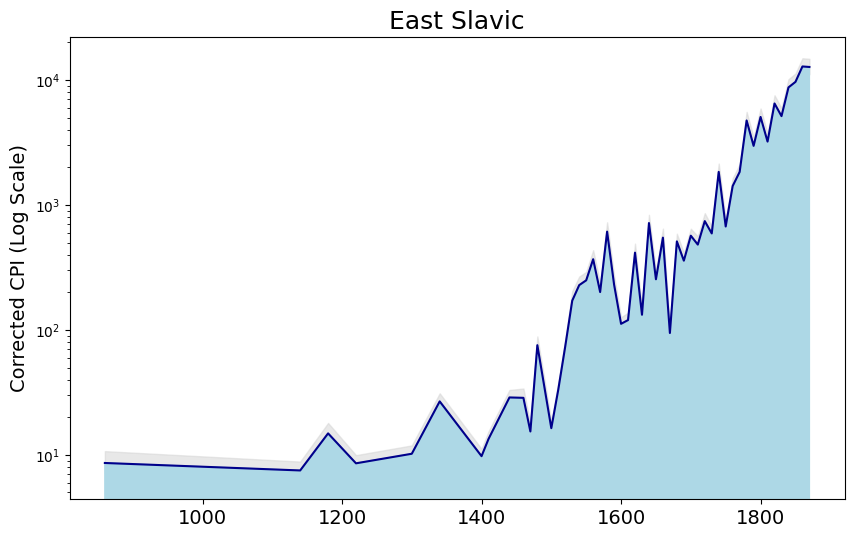

In [60]:
df = df_cultura.copy()

region = 'East Slavic'
df_region = df[df['region_name'] == region]
# df_region = df_region[df['decade']>=1000]


# Plot setup
plt.figure(figsize=(10, 6))

# LOESS regression for N_est
n = 0.05  # Smoothing fraction
lowess = sm.nonparametric.lowess(df_region['N_est'], df_region['decade'], frac=n)
plt.plot(lowess[:, 0], lowess[:, 1], label='N_est', color='darkblue')

# Compute LOESS for N_est_min and N_est_max
lowess_min = sm.nonparametric.lowess(df_region['N_est_min'], df_region['decade'], frac=n)
lowess_max = sm.nonparametric.lowess(df_region['N_est_max'], df_region['decade'], frac=n)

# Fill between the minimum and maximum LOESS regressions
plt.fill_between(lowess_min[:, 0], lowess_min[:, 1], lowess_max[:, 1], color='lightgrey', alpha=0.5)

# Fill from bottom to the N_est line
plt.fill_between(lowess[:, 0], plt.ylim()[0], lowess[:, 1], color='lightblue', alpha=1)

# Set y-axis ticks to every 100 and log scale
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.yscale('log')


# Add title and labels
plt.title('East Slavic',fontsize=18)
plt.xlabel('')
plt.ylabel('Corrected CPI (Log Scale)',  fontsize=14)
plt.tick_params(axis='x', labelsize=14)  # Increase the font size to 14 or any other size as desired

if display_periods:

    # Highlight the Heian period with vertical lines and fill
    heian_start, heian_end = 880, 1240
    plt.axvline(x=heian_start, color='grey', linestyle='--')
    plt.axvline(x=heian_end, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start, x2=heian_end, color='lightgrey', alpha=0.3)

    plt.text((heian_start + heian_end) / 2, plt.ylim()[1]-10000, 'Kievan Rus', horizontalalignment='center', verticalalignment='top', fontsize=20, color='black')


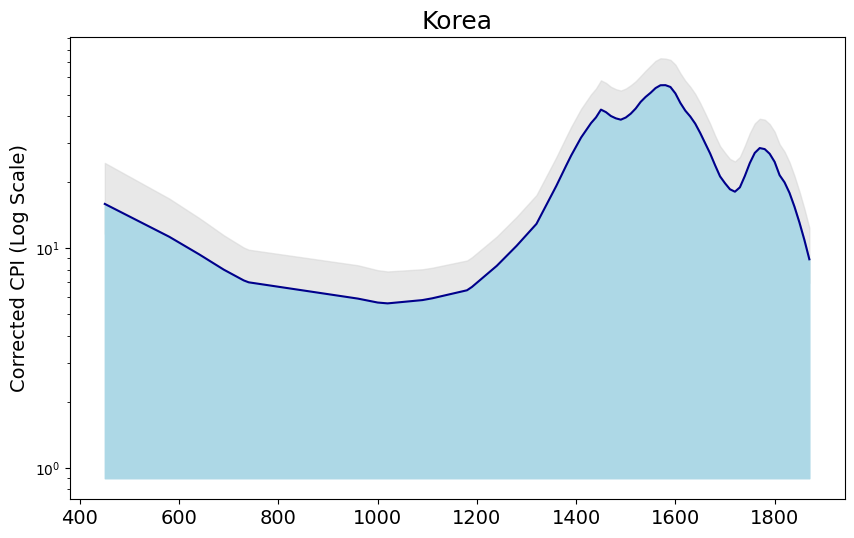

In [38]:
df = df_cultura.copy()

region = 'Korea'
df_region = df[df['region_name'] == region]
# df_region = df_region[df['decade']>=1000]


# Plot setup
plt.figure(figsize=(10, 6))

# LOESS regression for N_est
n = 0.2  # Smoothing fraction
lowess = sm.nonparametric.lowess(df_region['N_est'], df_region['decade'], frac=n)
plt.plot(lowess[:, 0], lowess[:, 1], label='N_est', color='darkblue')

# Compute LOESS for N_est_min and N_est_max
lowess_min = sm.nonparametric.lowess(df_region['N_est_min'], df_region['decade'], frac=n)
lowess_max = sm.nonparametric.lowess(df_region['N_est_max'], df_region['decade'], frac=n)

# Fill between the minimum and maximum LOESS regressions
plt.fill_between(lowess_min[:, 0], lowess_min[:, 1], lowess_max[:, 1], color='lightgrey', alpha=0.5)

# Fill from bottom to the N_est line
plt.fill_between(lowess[:, 0], plt.ylim()[0], lowess[:, 1], color='lightblue', alpha=1)

# Set y-axis ticks to every 100 and log scale
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.yscale('log')


# Add title and labels
plt.title('Korea',fontsize=18)
plt.xlabel('')
plt.ylabel('Corrected CPI (Log Scale)',  fontsize=14)
plt.tick_params(axis='x', labelsize=14)  # Increase the font size to 14 or any other size as desired

if display_periods:

    # Highlight the Heian period with vertical lines and fill
    heian_start, heian_end = 1392, 1850
    plt.axvline(x=heian_start, color='grey', linestyle='--')
    plt.axvline(x=heian_end, color='grey', linestyle='--')
    plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], x1=heian_start, x2=heian_end, color='lightgrey', alpha=0.3)

    plt.text((heian_start + heian_end) / 2, plt.ylim()[1]-10, 'Joseon dynasty', horizontalalignment='center', verticalalignment='top', fontsize=20, color='black')
